# **PROBLEM STATEMENT**

A Microfinance Institution (MFI) is an organization that offers financial services to low income populations. MFS becomes very useful when targeting especially the unbanked poor families living in remote areas with not much sources of income. The Microfinance services (MFS) provided by MFI are Group Loans, Agricultural Loans, Individual Business Loans and so on. 
Many microfinance institutions (MFI), experts and donors are supporting the idea of using mobile financial services (MFS) which they feel are more convenient and efficient, and cost saving, than the traditional high-touch model used since long for the purpose of delivering microfinance services. Though, the MFI industry is primarily focusing on low income families and are very useful in such areas, the implementation of MFS has been uneven with both significant challenges and successes.
Today, microfinance is widely accepted as a poverty-reduction tool, representing $70 billion in outstanding loans and a global outreach of 200 million clients.
We are working with one such client that is in Telecom Industry. They are a fixed wireless telecommunications network provider. They have launched various products and have developed its business and organization based on the budget operator model, offering better products at Lower Prices to all value conscious customers through a strategy of disruptive innovation that focuses on the subscriber. 
They understand the importance of communication and how it affects a person’s life, thus, focusing on providing their services and products to low income families and poor customers that can help them in the need of hour. 
They are collaborating with an MFI to provide micro-credit on mobile balances to be paid back in 5 days. The Consumer is believed to be defaulter if he deviates from the path of paying back the loaned amount within the time duration of 5 days. For the loan amount of 5 (in Indonesian Rupiah), payback amount should be 6 (in Indonesian Rupiah), while, for the loan amount of 10 (in Indonesian Rupiah), the payback amount should be 12 (in Indonesian Rupiah). 
The sample data is provided to us from our client database. It is hereby given to you for this exercise. In order to improve the selection of customers for the credit, the client wants some predictions that could help them in further investment and improvement in selection of customers. 


# **EXERCISE**:

Build a model which can be used to predict in terms of a probability for each loan transaction, whether the customer will be paying back the loaned amount within 5 days of insurance of loan. In this case, Label ‘1’ indicates that the loan has been payed i.e. Non- defaulter, while, Label ‘0’ indicates that the loan has not been payed i.e. defaulter. 

Importing Required Libraries for this problem statement

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
credit=pd.read_csv("Data file.csv")

In [3]:
credit

,Unnamed: 0,label,msisdn,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,...,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90,pcircle,pdate
0,1,0,21408I70789,272.0,3055.050000,3065.150000,220.13,260.13,2.0,0.0,...,6.0,0.0,2.0,12,6,0.0,29.000000,29.000000,UPW,2016-07-20
1,2,1,76462I70374,712.0,12122.000000,12124.750000,3691.26,3691.26,20.0,0.0,...,12.0,0.0,1.0,12,12,0.0,0.000000,0.000000,UPW,2016-08-10
2,3,1,17943I70372,535.0,1398.000000,1398.000000,900.13,900.13,3.0,0.0,...,6.0,0.0,1.0,6,6,0.0,0.000000,0.000000,UPW,2016-08-19
3,4,1,55773I70781,241.0,21.228000,21.228000,159.42,159.42,41.0,0.0,...,6.0,0.0,2.0,12,6,0.0,0.000000,0.000000,UPW,2016-06-06
4,5,1,03813I82730,947.0,150.619333,150.619333,1098.90,1098.90,4.0,0.0,...,6.0,0.0,7.0,42,6,0.0,2.333333,2.333333,UPW,2016-06-22
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
209588,209589,1,22758I85348,404.0,151.872333,151.872333,1089.19,1089.19,1.0,0.0,...,6.0,0.0,2.0,12,6,0.0,1.000000,1.000000,UPW,2016-06-17
209589,209590,1,95583I84455,1075.0,36.936000,36.936000,1728.36,1728.36,4.0,0.0,...,6.0,0.0,3.0,18,6,0.0,1.000000,1.000000,UPW,2016-06-12
209590,209591,1,28556I85350,1013.0,11843.111667,11904.350000,5861.83,8893.20,3.0,0.0,...,12.0,0.0,6.0,54,12,0.0,4.000000,3.833333,UPW,2016-07-29
209591,209592,1,59712I82733,1732.0,12488.228333,12574.370000,411.83,984.58,2.0,38.0,...,12.0,0.0,3.0,24,12,0.0,0.000000,10.500000,UPW,2016-07-25


**Observations**

This data set contains 209593 rows & 37 columns

In [4]:
credit.head()

,Unnamed: 0,label,msisdn,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,...,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90,pcircle,pdate
0,1,0,21408I70789,272.0,3055.050000,3065.150000,220.13,260.13,2.0,0.0,...,6.0,0.0,2.0,12,6,0.0,29.000000,29.000000,UPW,2016-07-20
1,2,1,76462I70374,712.0,12122.000000,12124.750000,3691.26,3691.26,20.0,0.0,...,12.0,0.0,1.0,12,12,0.0,0.000000,0.000000,UPW,2016-08-10
2,3,1,17943I70372,535.0,1398.000000,1398.000000,900.13,900.13,3.0,0.0,...,6.0,0.0,1.0,6,6,0.0,0.000000,0.000000,UPW,2016-08-19
3,4,1,55773I70781,241.0,21.228000,21.228000,159.42,159.42,41.0,0.0,...,6.0,0.0,2.0,12,6,0.0,0.000000,0.000000,UPW,2016-06-06
4,5,1,03813I82730,947.0,150.619333,150.619333,1098.90,1098.90,4.0,0.0,...,6.0,0.0,7.0,42,6,0.0,2.333333,2.333333,UPW,2016-06-22


**Observations**

Showing top 5 Rows of the Data set

In [5]:
credit.tail()

,Unnamed: 0,label,msisdn,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,...,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90,pcircle,pdate
209588,209589,1,22758I85348,404.0,151.872333,151.872333,1089.19,1089.19,1.0,0.0,...,6.0,0.0,2.0,12,6,0.0,1.0,1.000000,UPW,2016-06-17
209589,209590,1,95583I84455,1075.0,36.936000,36.936000,1728.36,1728.36,4.0,0.0,...,6.0,0.0,3.0,18,6,0.0,1.0,1.000000,UPW,2016-06-12
209590,209591,1,28556I85350,1013.0,11843.111667,11904.350000,5861.83,8893.20,3.0,0.0,...,12.0,0.0,6.0,54,12,0.0,4.0,3.833333,UPW,2016-07-29
209591,209592,1,59712I82733,1732.0,12488.228333,12574.370000,411.83,984.58,2.0,38.0,...,12.0,0.0,3.0,24,12,0.0,0.0,10.500000,UPW,2016-07-25
209592,209593,1,65061I85339,1581.0,4489.362000,4534.820000,483.92,631.20,13.0,0.0,...,12.0,0.0,2.0,18,12,0.0,0.0,0.000000,UPW,2016-07-07


**Observations**

Showing bottom 5 rows of Data set

In [6]:
credit.columns

Index(['Unnamed: 0', 'label', 'msisdn', 'aon', 'daily_decr30', 'daily_decr90',
       'rental30', 'rental90', 'last_rech_date_ma', 'last_rech_date_da',
       'last_rech_amt_ma', 'cnt_ma_rech30', 'fr_ma_rech30',
       'sumamnt_ma_rech30', 'medianamnt_ma_rech30', 'medianmarechprebal30',
       'cnt_ma_rech90', 'fr_ma_rech90', 'sumamnt_ma_rech90',
       'medianamnt_ma_rech90', 'medianmarechprebal90', 'cnt_da_rech30',
       'fr_da_rech30', 'cnt_da_rech90', 'fr_da_rech90', 'cnt_loans30',
       'amnt_loans30', 'maxamnt_loans30', 'medianamnt_loans30', 'cnt_loans90',
       'amnt_loans90', 'maxamnt_loans90', 'medianamnt_loans90', 'payback30',
       'payback90', 'pcircle', 'pdate'],
      dtype='object')

**Observations**

Showing how many different columns are present in the given Data set.

In [7]:
len(credit)

209593

**Observations**

It show the length of Data set

In [8]:
credit.dtypes

Unnamed: 0                int64
label                     int64
msisdn                   object
aon                     float64
daily_decr30            float64
daily_decr90            float64
rental30                float64
rental90                float64
last_rech_date_ma       float64
last_rech_date_da       float64
last_rech_amt_ma          int64
cnt_ma_rech30             int64
fr_ma_rech30            float64
sumamnt_ma_rech30       float64
medianamnt_ma_rech30    float64
medianmarechprebal30    float64
cnt_ma_rech90             int64
fr_ma_rech90              int64
sumamnt_ma_rech90         int64
medianamnt_ma_rech90    float64
medianmarechprebal90    float64
cnt_da_rech30           float64
fr_da_rech30            float64
cnt_da_rech90             int64
fr_da_rech90              int64
cnt_loans30               int64
amnt_loans30              int64
maxamnt_loans30         float64
medianamnt_loans30      float64
cnt_loans90             float64
amnt_loans90              int64
maxamnt_

**Observations**

It shows Data types for the given Data in each column

In [9]:
credit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 209593 entries, 0 to 209592
Data columns (total 37 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Unnamed: 0            209593 non-null  int64  
 1   label                 209593 non-null  int64  
 2   msisdn                209593 non-null  object 
 3   aon                   209593 non-null  float64
 4   daily_decr30          209593 non-null  float64
 5   daily_decr90          209593 non-null  float64
 6   rental30              209593 non-null  float64
 7   rental90              209593 non-null  float64
 8   last_rech_date_ma     209593 non-null  float64
 9   last_rech_date_da     209593 non-null  float64
 10  last_rech_amt_ma      209593 non-null  int64  
 11  cnt_ma_rech30         209593 non-null  int64  
 12  fr_ma_rech30          209593 non-null  float64
 13  sumamnt_ma_rech30     209593 non-null  float64
 14  medianamnt_ma_rech30  209593 non-null  float64
 15  

**Observations**

a)The info() means it gives complete information about the given Data.

b)Data types will shown for every column.

c)Memory the Data set use.

d) Last but not least it shows is there any missing Data present in the Data set or not, Although this info() function shows but prefere by isnull() method. which will give clear picture.


In [10]:
credit.isnull().sum()

Unnamed: 0              0
label                   0
msisdn                  0
aon                     0
daily_decr30            0
daily_decr90            0
rental30                0
rental90                0
last_rech_date_ma       0
last_rech_date_da       0
last_rech_amt_ma        0
cnt_ma_rech30           0
fr_ma_rech30            0
sumamnt_ma_rech30       0
medianamnt_ma_rech30    0
medianmarechprebal30    0
cnt_ma_rech90           0
fr_ma_rech90            0
sumamnt_ma_rech90       0
medianamnt_ma_rech90    0
medianmarechprebal90    0
cnt_da_rech30           0
fr_da_rech30            0
cnt_da_rech90           0
fr_da_rech90            0
cnt_loans30             0
amnt_loans30            0
maxamnt_loans30         0
medianamnt_loans30      0
cnt_loans90             0
amnt_loans90            0
maxamnt_loans90         0
medianamnt_loans90      0
payback30               0
payback90               0
pcircle                 0
pdate                   0
dtype: int64

**Observations**

Great there is no Null/Missing Data is present in this Data set.

<AxesSubplot:>

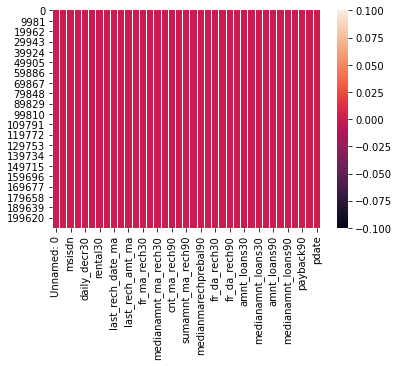

In [11]:
sns.heatmap(credit.isnull())

**Observations**

My self visualize through **heatmap**.

As in the given Data set there is an column with name as **Unnamed: 0** is of no use so simply drop it for the Data set.

In [12]:
credit= credit.drop(['Unnamed: 0'], axis=1)

**Observations**

I have droped it from the Data set.

In [13]:
credit

,label,msisdn,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,...,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90,pcircle,pdate
0,0,21408I70789,272.0,3055.050000,3065.150000,220.13,260.13,2.0,0.0,1539,...,6.0,0.0,2.0,12,6,0.0,29.000000,29.000000,UPW,2016-07-20
1,1,76462I70374,712.0,12122.000000,12124.750000,3691.26,3691.26,20.0,0.0,5787,...,12.0,0.0,1.0,12,12,0.0,0.000000,0.000000,UPW,2016-08-10
2,1,17943I70372,535.0,1398.000000,1398.000000,900.13,900.13,3.0,0.0,1539,...,6.0,0.0,1.0,6,6,0.0,0.000000,0.000000,UPW,2016-08-19
3,1,55773I70781,241.0,21.228000,21.228000,159.42,159.42,41.0,0.0,947,...,6.0,0.0,2.0,12,6,0.0,0.000000,0.000000,UPW,2016-06-06
4,1,03813I82730,947.0,150.619333,150.619333,1098.90,1098.90,4.0,0.0,2309,...,6.0,0.0,7.0,42,6,0.0,2.333333,2.333333,UPW,2016-06-22
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
209588,1,22758I85348,404.0,151.872333,151.872333,1089.19,1089.19,1.0,0.0,4048,...,6.0,0.0,2.0,12,6,0.0,1.000000,1.000000,UPW,2016-06-17
209589,1,95583I84455,1075.0,36.936000,36.936000,1728.36,1728.36,4.0,0.0,773,...,6.0,0.0,3.0,18,6,0.0,1.000000,1.000000,UPW,2016-06-12
209590,1,28556I85350,1013.0,11843.111667,11904.350000,5861.83,8893.20,3.0,0.0,1539,...,12.0,0.0,6.0,54,12,0.0,4.000000,3.833333,UPW,2016-07-29
209591,1,59712I82733,1732.0,12488.228333,12574.370000,411.83,984.58,2.0,38.0,773,...,12.0,0.0,3.0,24,12,0.0,0.000000,10.500000,UPW,2016-07-25


**Observations**

It has **209593** rows & **37** columns now it has only **36** columns.

In [14]:
for column in credit.columns:
    if credit[column].dtypes==object:
        print(str(column)+':'+str(credit[column].unique()))
        print('..........................................')
        print('\n')

msisdn:['21408I70789' '76462I70374' '17943I70372' ... '22758I85348' '59712I82733'
 '65061I85339']
..........................................


pcircle:['UPW']
..........................................


pdate:['2016-07-20' '2016-08-10' '2016-08-19' '2016-06-06' '2016-06-22'
 '2016-07-02' '2016-07-05' '2016-08-05' '2016-06-15' '2016-06-08'
 '2016-06-12' '2016-06-20' '2016-06-29' '2016-06-16' '2016-08-03'
 '2016-06-24' '2016-07-04' '2016-07-03' '2016-07-01' '2016-08-08'
 '2016-06-26' '2016-06-23' '2016-07-06' '2016-07-09' '2016-06-10'
 '2016-06-07' '2016-06-27' '2016-08-11' '2016-06-30' '2016-06-19'
 '2016-07-26' '2016-08-14' '2016-06-14' '2016-06-21' '2016-06-25'
 '2016-06-28' '2016-06-11' '2016-07-27' '2016-07-23' '2016-08-16'
 '2016-08-15' '2016-06-02' '2016-06-05' '2016-08-02' '2016-07-28'
 '2016-07-18' '2016-08-18' '2016-07-16' '2016-07-29' '2016-07-21'
 '2016-06-03' '2016-06-13' '2016-08-01' '2016-07-13' '2016-07-10'
 '2016-06-09' '2016-07-15' '2016-07-11' '2016-08-09' '2016-08-12

**Observations**

I took for loop for all Object Data types of the Data so in this process i found that the column Pcircle has only **UPW** so i can drop it

In [15]:
credit= credit.drop(['pcircle'], axis=1)

In [16]:
credit

,label,msisdn,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,...,amnt_loans30,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90,pdate
0,0,21408I70789,272.0,3055.050000,3065.150000,220.13,260.13,2.0,0.0,1539,...,12,6.0,0.0,2.0,12,6,0.0,29.000000,29.000000,2016-07-20
1,1,76462I70374,712.0,12122.000000,12124.750000,3691.26,3691.26,20.0,0.0,5787,...,12,12.0,0.0,1.0,12,12,0.0,0.000000,0.000000,2016-08-10
2,1,17943I70372,535.0,1398.000000,1398.000000,900.13,900.13,3.0,0.0,1539,...,6,6.0,0.0,1.0,6,6,0.0,0.000000,0.000000,2016-08-19
3,1,55773I70781,241.0,21.228000,21.228000,159.42,159.42,41.0,0.0,947,...,12,6.0,0.0,2.0,12,6,0.0,0.000000,0.000000,2016-06-06
4,1,03813I82730,947.0,150.619333,150.619333,1098.90,1098.90,4.0,0.0,2309,...,42,6.0,0.0,7.0,42,6,0.0,2.333333,2.333333,2016-06-22
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
209588,1,22758I85348,404.0,151.872333,151.872333,1089.19,1089.19,1.0,0.0,4048,...,12,6.0,0.0,2.0,12,6,0.0,1.000000,1.000000,2016-06-17
209589,1,95583I84455,1075.0,36.936000,36.936000,1728.36,1728.36,4.0,0.0,773,...,18,6.0,0.0,3.0,18,6,0.0,1.000000,1.000000,2016-06-12
209590,1,28556I85350,1013.0,11843.111667,11904.350000,5861.83,8893.20,3.0,0.0,1539,...,42,12.0,0.0,6.0,54,12,0.0,4.000000,3.833333,2016-07-29
209591,1,59712I82733,1732.0,12488.228333,12574.370000,411.83,984.58,2.0,38.0,773,...,18,12.0,0.0,3.0,24,12,0.0,0.000000,10.500000,2016-07-25


**Observations**

Now i dropped another unwanted column from Data set

In [17]:
credit['pdays']=pd.to_datetime(credit.pdate,dayfirst=False).dt.day
credit['pmonth']=pd.to_datetime(credit.pdate,dayfirst=False).dt.month

**Observations**

As the column **Pdate** is in combination of Date & Month So i seperated it by **pdays** & **pmonth** respectively.

In [18]:
credit.head(2)

,label,msisdn,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,...,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90,pdate,pdays,pmonth
0,0,21408I70789,272.0,3055.05,3065.15,220.13,260.13,2.0,0.0,1539,...,0.0,2.0,12,6,0.0,29.0,29.0,2016-07-20,20,7
1,1,76462I70374,712.0,12122.00,12124.75,3691.26,3691.26,20.0,0.0,5787,...,0.0,1.0,12,12,0.0,0.0,0.0,2016-08-10,10,8


In [19]:
credit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 209593 entries, 0 to 209592
Data columns (total 37 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   label                 209593 non-null  int64  
 1   msisdn                209593 non-null  object 
 2   aon                   209593 non-null  float64
 3   daily_decr30          209593 non-null  float64
 4   daily_decr90          209593 non-null  float64
 5   rental30              209593 non-null  float64
 6   rental90              209593 non-null  float64
 7   last_rech_date_ma     209593 non-null  float64
 8   last_rech_date_da     209593 non-null  float64
 9   last_rech_amt_ma      209593 non-null  int64  
 10  cnt_ma_rech30         209593 non-null  int64  
 11  fr_ma_rech30          209593 non-null  float64
 12  sumamnt_ma_rech30     209593 non-null  float64
 13  medianamnt_ma_rech30  209593 non-null  float64
 14  medianmarechprebal30  209593 non-null  float64
 15  

**Observations**

If we observe carefully before there is 3 Object columns now here there is only 2 Object columns as we seperated them.

# STASTICAL SUMMARY FOR THE DATA

In [20]:
credit.describe()

,label,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,cnt_ma_rech30,...,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90,pdays,pmonth
count,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,...,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.00000,209593.000000
mean,0.875177,8112.343445,5381.402289,6082.515068,2692.581910,3483.406534,3755.847800,3712.202921,2064.452797,3.978057,...,274.658747,0.054029,18.520919,23.645398,6.703134,0.046077,3.398826,4.321485,14.39894,6.797321
std,0.330519,75696.082531,9220.623400,10918.812767,4308.586781,5770.461279,53905.892230,53374.833430,2370.786034,4.256090,...,4245.264648,0.218039,224.797423,26.469861,2.103864,0.200692,8.813729,10.308108,8.43890,0.741435
min,0.000000,-48.000000,-93.012667,-93.012667,-23737.140000,-24720.580000,-29.000000,-29.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.00000,6.000000
25%,1.000000,246.000000,42.440000,42.692000,280.420000,300.260000,1.000000,0.000000,770.000000,1.000000,...,6.000000,0.000000,1.000000,6.000000,6.000000,0.000000,0.000000,0.000000,7.00000,6.000000
50%,1.000000,527.000000,1469.175667,1500.000000,1083.570000,1334.000000,3.000000,0.000000,1539.000000,3.000000,...,6.000000,0.000000,2.000000,12.000000,6.000000,0.000000,0.000000,1.666667,14.00000,7.000000
75%,1.000000,982.000000,7244.000000,7802.790000,3356.940000,4201.790000,7.000000,0.000000,2309.000000,5.000000,...,6.000000,0.000000,5.000000,30.000000,6.000000,0.000000,3.750000,4.500000,21.00000,7.000000
max,1.000000,999860.755168,265926.000000,320630.000000,198926.110000,200148.110000,998650.377733,999171.809410,55000.000000,203.000000,...,99864.560864,3.000000,4997.517944,438.000000,12.000000,3.000000,171.500000,171.500000,31.00000,8.000000


**Observations**

a)This Stastical Summary helps us to identify the Mean, Median, Mode, Minimun & Maximum value for the given Data.

b) If we observe for **lable** column value of Mean is less than Median i.e 50%  so there will be not much of outliers were present.

c) If we observe for **aon** column value of Mean is is greater than Median i.e 50%  so there was an outliers present in the given Data similarly for all columns. 

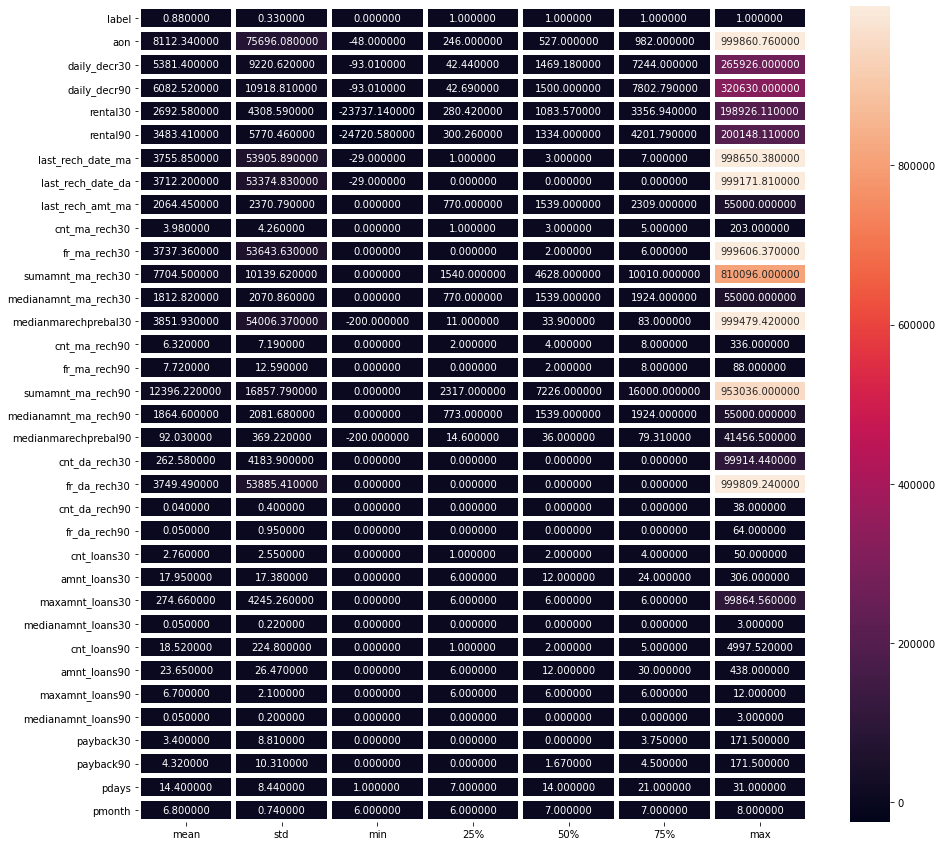

In [21]:
plt.figure(figsize=(15,15))
sns.heatmap(round(credit.describe()[1:].transpose(),2),linewidth=4,annot=True,fmt="f")

plt.show()

**Observations**

describe option is used to understand the basic statistical details like mean, Standard Deviation, Percentiles which helps us to make a comparitive analysis and understand ho data is distributed

Difference between Q3 and max 'msisdn', 'aon', 'daily_decr30', 'daily_decr90','rental30', 'rental90', 'last_rech_date_ma','last_rech_date_da', 'fr_ma_rech30','sumamnt_ma_rech30', 'medianamnt_ma_rech30', 'medianmarechprebal30','sumamnt_ma_rech90','cnt_da_rech30', 'fr_da_rech30','maxamnt_loans30'.

Difference between Mean and Std: 'msisdn','aon','last_rech_date_ma','last_rech_date_da','fr_ma_rech30','medianmarechprebal30', 'medianmarechprebal90','cnt_da_rech30','fr_da_rech30','maxamnt_loans30','cnt_loan90'.

Difference between min and Q1: 'sumamnt_ma_rech90','medianmarechprebal90','medianamnt_ma_rech90','sumamnt_ma_rech30','medianmarechprebal30', 'medianamnt_ma_rech30',''last_rech_date_ma','last_rech_date_da','last_rech_amnt_ma','aon', 'daily_decr30', 'daily_decr90','rental30', 'rental90'

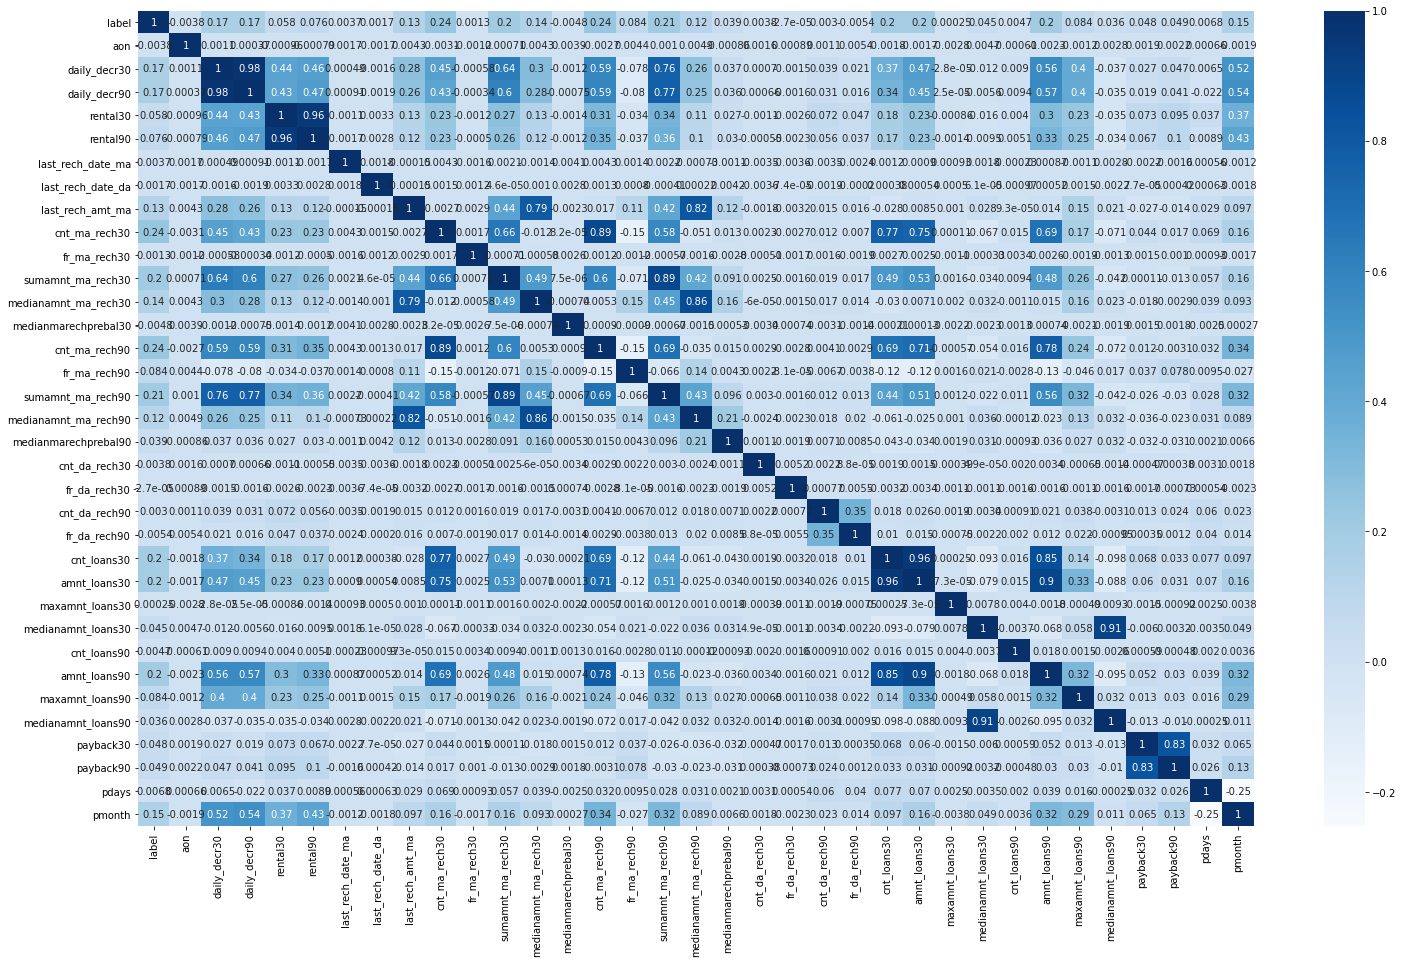

In [22]:
credit.corr()
plt.figure(figsize=(25,15))
sns.heatmap(credit.corr(),cmap='Blues',annot=True)
plt.show()

Text(0.5, 1.0, 'correlation with target variables')

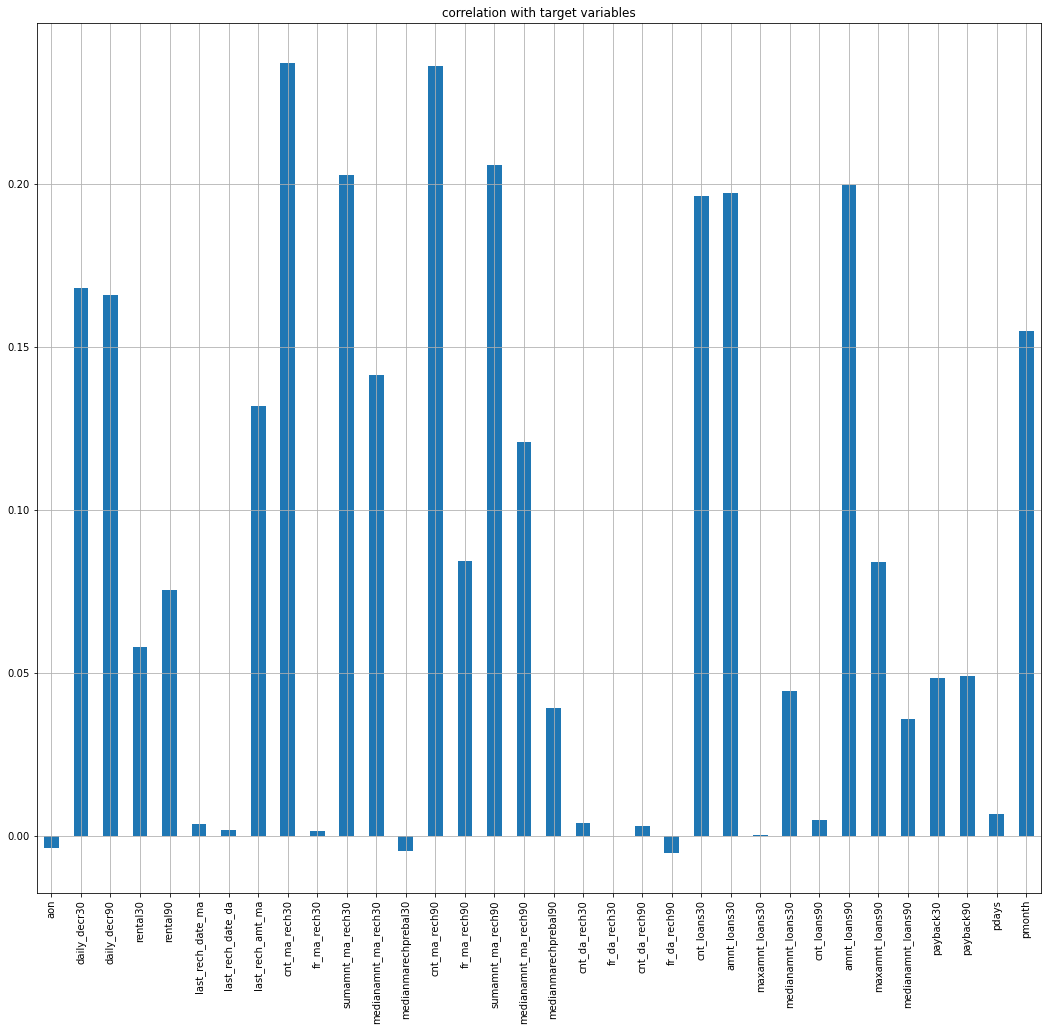

In [23]:
plt.figure(figsize=(18,16))
credit.drop('label',axis=1).corrwith(credit['label']).plot(kind='bar',grid=True)
plt.xticks(rotation=90)
plt.title("correlation with target variables")

**Observations**

Postively high correlated variables:- 'cnt_ma_rech30':24% 'cnt_ma_rech90':24% 'sumamnt_ma_rech30':21% 'sumamnt_ma_rech90':21% 'cnt_loans30':20% 'amnt_loans30':20% 'amnt_loans90':20% 'daily_decr30': 17% 'daily_decr90':17% 'pdate':15%

Postive correlation:- 'medianamnt_ma_rech30':14% 'last_rech_amt_ma':13% 'medianamnt_ma_rech90':12% 'fr_ma_rech90':8% 'maxamnt_loans90':8.4% 'rental90':7.6% 'rental30':5.8% 'medianamnt_loans30':4% 'payback30':4% 'payback90':4% 'medianamnt_loans90'3.6% 'medianmarechprebal90':3%

negative correlation:- 'fr_da_rech90' 'cnt_loans90' 'medianmarechprebal30'

'maxamnt_loans30', error 'fr_da_rech30'- error

# EXTRAPOLATORAY DATA ANALYSIS (EDA):-

UNIVARIATE ANALYSIS:-

In [24]:
credit.label.value_counts()

1    183431
0     26162
Name: label, dtype: int64

**Observations**

for lable column we have done value_counts. 

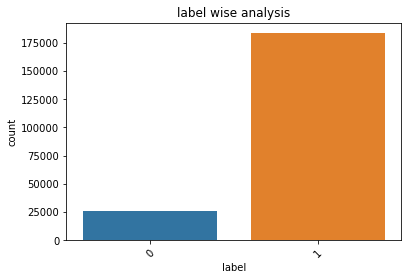

In [25]:
plt.subplots(figsize=(6,4))
sns.countplot(x='label',data=credit)
plt.title("label wise analysis")
plt.xlabel('label')
plt.ylabel('count')
plt.xticks(rotation=45)

plt.show()

**Observations**

We can observe from above datas with respect to label column non-defaulter=0 has 26162 counts while defaulter has high population of 1,83,431

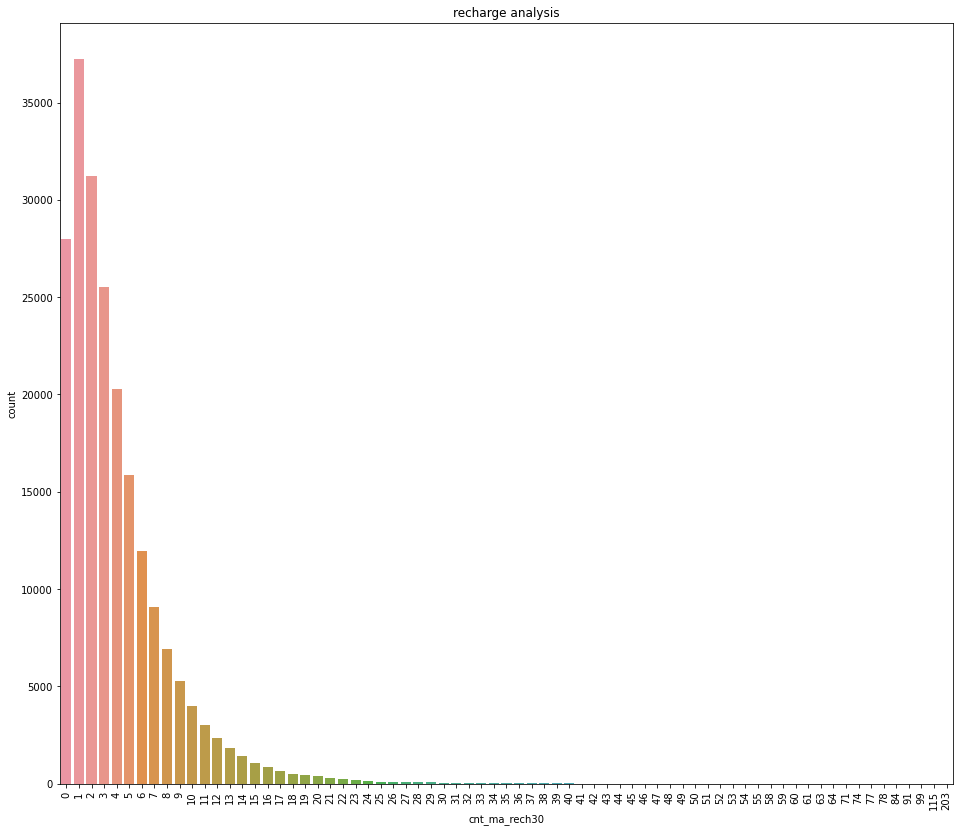

In [26]:
plt.subplots(figsize=(16,14))
sns.countplot(x='cnt_ma_rech30',data=credit)
plt.title("recharge analysis")
plt.xlabel('cnt_ma_rech30')
plt.ylabel('count')
plt.xticks(rotation=90)

plt.show()

**Observations**

number of times main account got recharged in last 30 days analysis shows 1&2 times recharge is more number follwed by no recharge and 3,4,5 respectively, this depicts 35,000 people recharge once in last 30days 30,000 people recharge twice in last 30days approximately 23,000 people have made no recharge in last 30days

In [27]:
df = credit.copy()

def chng1(prob):
    if prob == 0:
        return 'Defaulter'
    else:
        return 'Non-Defaulter'
df['label'] = df['label'].apply(chng1)

**Observations**

In order to analyse each column on basis number of defaulter and non - defaulter we are using define operand on label column

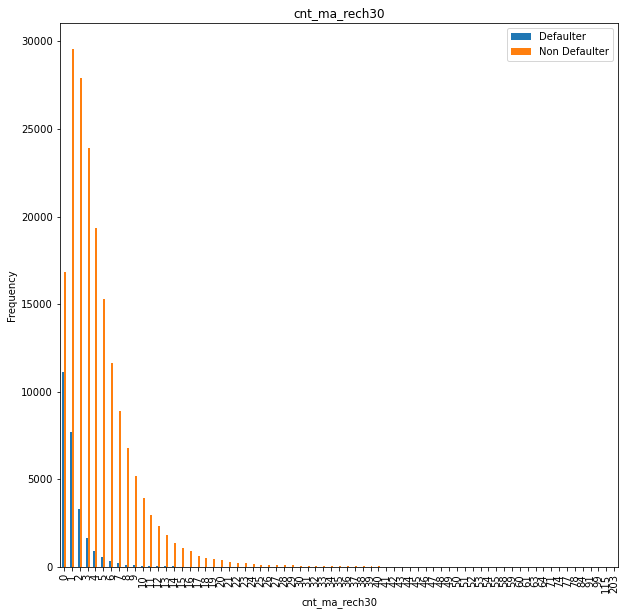

In [28]:
pd.crosstab(df.cnt_ma_rech30,df.label).plot(kind="bar",figsize=(10,10))
plt.title('cnt_ma_rech30')
plt.xlabel('cnt_ma_rech30')
plt.xticks(rotation=90)
plt.legend(["Defaulter", "Non Defaulter"])
plt.ylabel('Frequency')
plt.show()

**Observations**

cnt_ma_rech30=number of times main account got recharged in last 30days no recharge made in last 30days is highest of around 11,000 followed by once recharge made is around 8,000

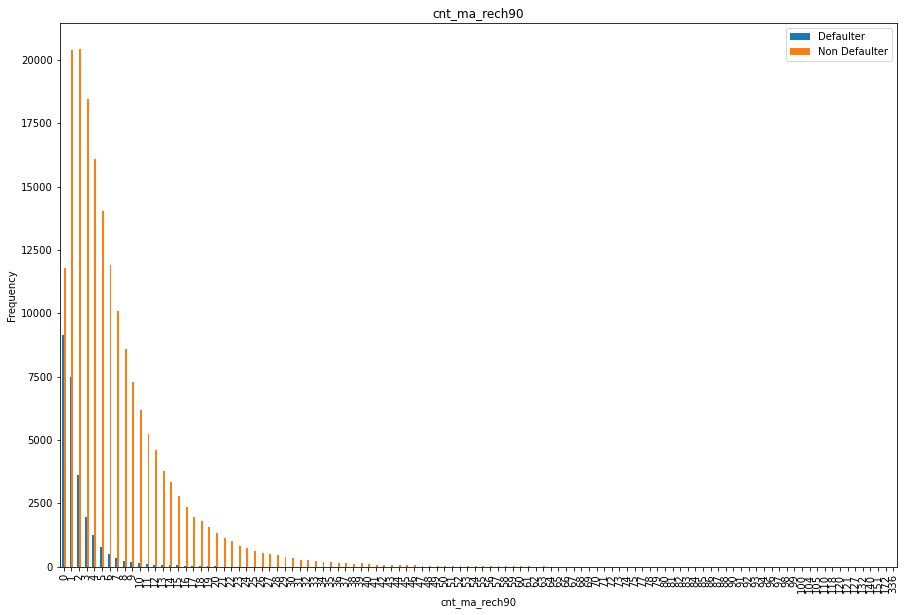

In [29]:
pd.crosstab(df.cnt_ma_rech90,df.label).plot(kind="bar",figsize=(15,10))
plt.title('cnt_ma_rech90')
plt.xlabel('cnt_ma_rech90')
plt.xticks(rotation=90)
plt.legend(["Defaulter", "Non Defaulter"])
plt.ylabel('Frequency')
plt.show()

**Observations**

cnt_ma_rech30=number of times main account got recharged in 90 last 90days While analaysing defaulters we could understand number of recharge made in last 90days is highest of around 9,000 followed by 7500 people made recharge once and 3000 people made recharge twice. Frequency of non - defaulters making recharge is 21,000 people made recharge once and twice,around 19, people made recharge three times

In [30]:
credit.sumamnt_ma_rech30

0          3078.0
1          5787.0
2          1539.0
3             0.0
4         20029.0
           ...   
209588    10404.0
209589     3092.0
209590     9334.0
209591    12154.0
209592     9065.0
Name: sumamnt_ma_rech30, Length: 209593, dtype: float64

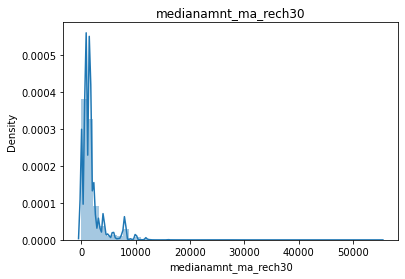

In [31]:
sns.distplot(credit["medianamnt_ma_rech30"])

plt.title("medianamnt_ma_rech30")
plt.show()

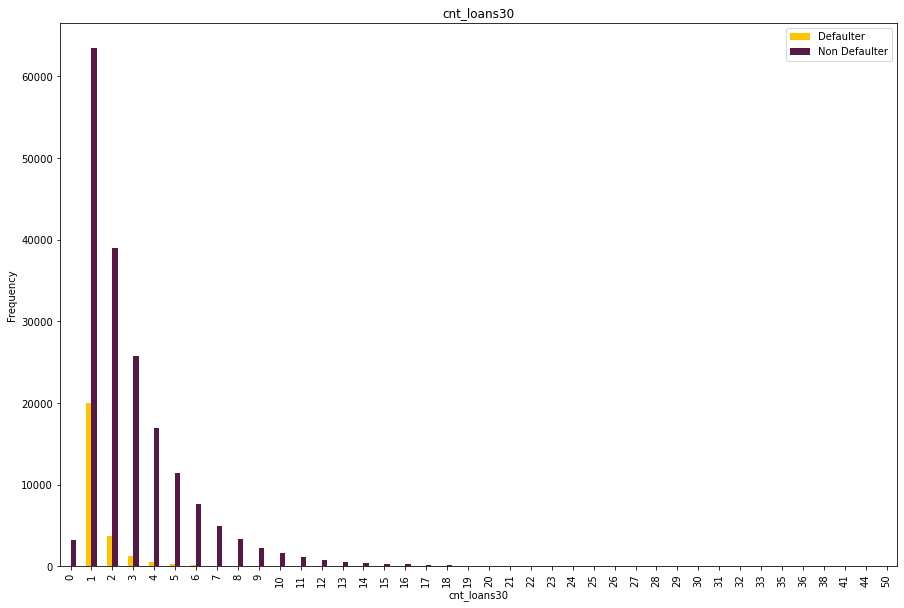

In [32]:
pd.crosstab(df.cnt_loans30,df.label).plot(kind="bar",figsize=(15,10),color=['#FFC300','#581845' ])
plt.title('cnt_loans30')
plt.xlabel('cnt_loans30')
plt.xticks(rotation=90)
plt.legend(["Defaulter", "Non Defaulter"])
plt.ylabel('Frequency')
plt.show()

**Observations**

cnt_loans30=number of times loan taken in last 30days 20,000 defaulters had taken loan once in last 30days 2,000 defaulters had taken loan twice in last 30days non defsulters of around 62,000 people has recharged once and 38,000 had recharged twice

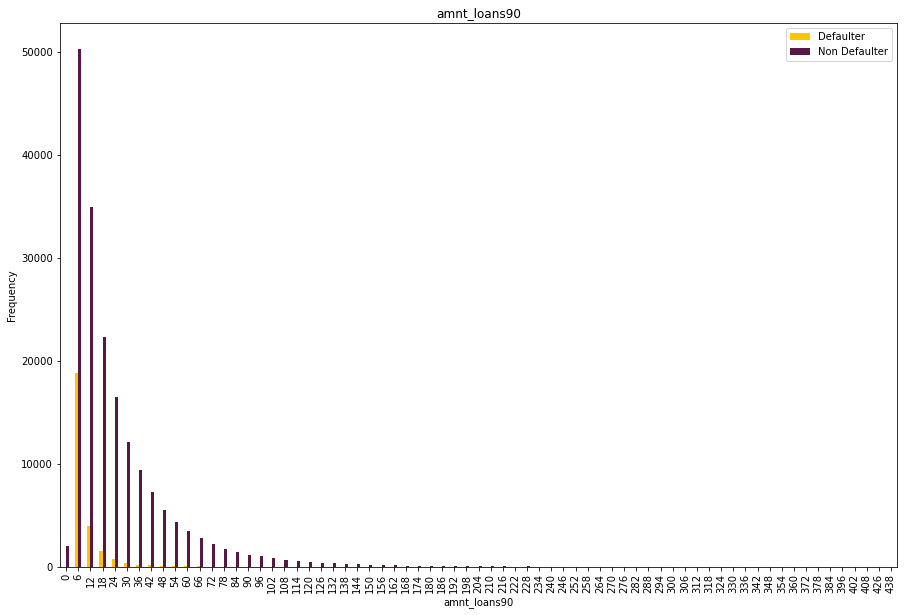

In [33]:
pd.crosstab(df.amnt_loans90,df.label).plot(kind="bar",figsize=(15,10),color=['#FFC300','#581845' ])
plt.title('amnt_loans90')
plt.xlabel('amnt_loans90')
plt.xticks(rotation=90)
plt.legend(["Defaulter", "Non Defaulter"])
plt.ylabel('Frequency')
plt.show()

**Observations**

amnt_loans90=total amount of loan taken in last 90 days In case of defauters around 19,000 people have taken loan 6 times in past 90 days

BIVARIATE ANALYSIS:-

The target column for prediction is label where: '0': Non - Defaulter '1': Defaulter

<AxesSubplot:xlabel='cnt_ma_rech30', ylabel='label'>

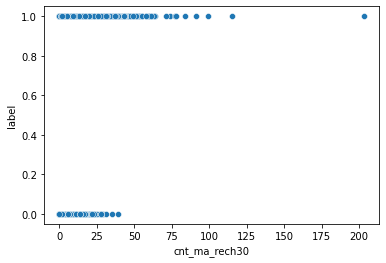

In [34]:
sns.scatterplot(x="cnt_ma_rech30",y="label",data=credit)

**Observations**

cnt_ma_rech30=number of times main account got recharged in last 30days is more in number by the defaulters compared to non defaulters.

<AxesSubplot:xlabel='cnt_ma_rech90', ylabel='label'>

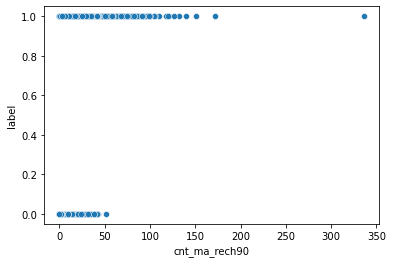

In [35]:
sns.scatterplot(x="cnt_ma_rech90",y="label",data=credit)

**Observations**

cnt_ma_rech90=number of times main account got recharged in last 90days in case of frequency of recharge is around 150 recharges made by defaulters compared to non defaulters whose frequency is 50

<AxesSubplot:xlabel='sumamnt_ma_rech30', ylabel='label'>

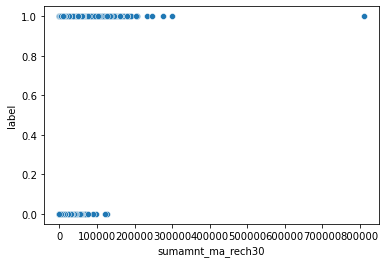

In [36]:
sns.scatterplot(x="sumamnt_ma_rech30",y='label', data=credit)

**Observations**

sumamnt_ma_rech30= total amount of recharge in main accunt in last 30 days is highest in defaulters ranging between 0-2,00,000 while amount of recharge made by defaulters is around 0 - 1,00,000

<AxesSubplot:xlabel='cnt_loans30', ylabel='label'>

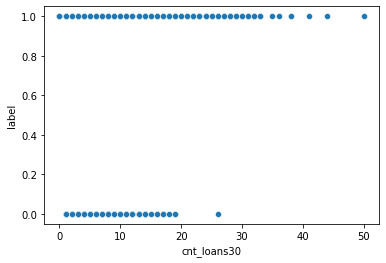

In [37]:
sns.scatterplot(x="cnt_loans30",y='label', data=credit)

**Observations**

cnt_loans30= Number of loans taken by users in last 30 days frequency of recharge made by defaulters is highest ranging between 0-30 times in kast 30 days while non defaulters have made around 0 - 20 times in last 30days.

<AxesSubplot:xlabel='sumamnt_ma_rech90', ylabel='label'>

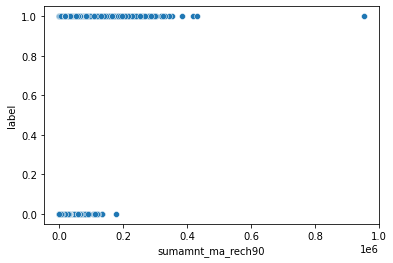

In [38]:
sns.scatterplot(x="sumamnt_ma_rech90",y="label",data=credit)

**Observations**

sumamnt_ma_rech90= total amount of recharge in main accunt in last 90 days In case of non defaulters total recharge made is around 2,00,000 and defaulters have again made more amount of recharge ranging upto 4,00,00 in total

<AxesSubplot:xlabel='amnt_loans30', ylabel='label'>

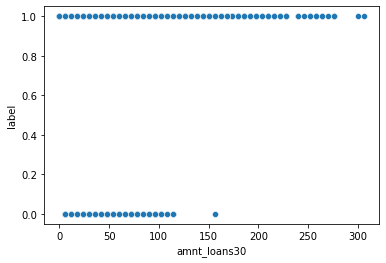

In [39]:
sns.scatterplot(x="amnt_loans30",y="label",data=credit)

**Observations**

amnt_loans30= Total amount of loan taken by users in last 30 days is highest among defaulters ranging between 0 - 250 while among non defaulters it is between 0 - 100 Therfore amount of loan taken by defaulters are high compared to non defaulters

<AxesSubplot:xlabel='amnt_loans90', ylabel='label'>

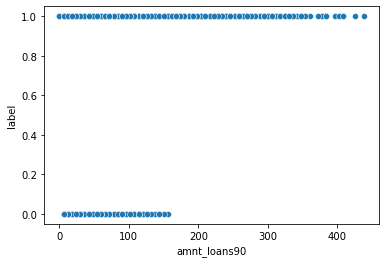

In [40]:
sns.scatterplot(x="amnt_loans90",y="label",data=credit)

**Observations**

amnt_loans9= Total amount of loan taken by users in last 90days Even in 90 days the defaulters have taken highest amount of loan (0-400) compared to defaulters (0-150)

<AxesSubplot:xlabel='daily_decr30', ylabel='label'>

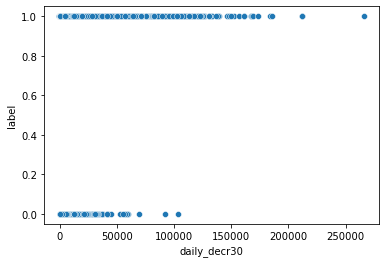

In [41]:
sns.scatterplot(x="daily_decr30",y="label",data=credit)

**Observations**

daily_decr30 = daily amount spent from main account averaged in last 30 days defaulters has spent 2,00,000 where as non defaulters have sent around 50,000 Hence we can conclude defultters are the ones who are using and spending in high number and high amount

<AxesSubplot:xlabel='daily_decr90', ylabel='label'>

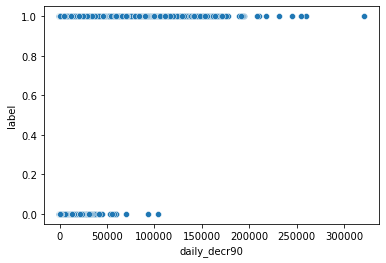

In [42]:
sns.scatterplot(x="daily_decr90",y="label", data=credit)

**Observations**

daily_decr90 = daily amount spent from main account averaged in last 90 days defaulters has spent 2,00,000 - 2,50,000 where as non defaulters have sent around 50,000 - 60,0000 Hence we can conclude defultters are the ones who are using and spending in high number and high amount

<AxesSubplot:xlabel='medianamnt_ma_rech30', ylabel='label'>

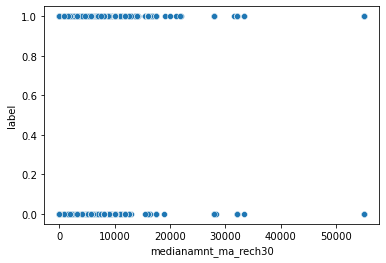

In [43]:
sns.scatterplot(x="medianamnt_ma_rech30",y="label",data=credit)


**Observations**

medianamnt_ma_rech30 = median amount of recharges made in main account in last 30 days their is no much difference but we can observe the density is high among defaulters hence defaulters have recharged more amount



<AxesSubplot:xlabel='medianamnt_ma_rech90', ylabel='label'>

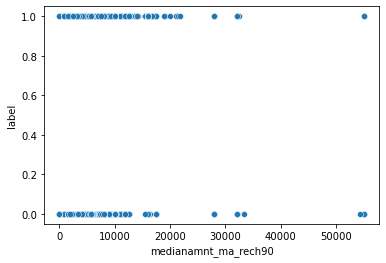

In [44]:
sns.scatterplot(x="medianamnt_ma_rech90",y="label",data=credit)


**Observations**

medianamnt_ma_rech90 = median amount of recharges made in main account in last 90 day we can observe high among recharges are made by defaulters ranging 0 - 2,00,000 while non defaulters have recharged around 0 - 1,00,000 hence defaulters have recharged more amount



<AxesSubplot:xlabel='last_rech_amt_ma', ylabel='label'>

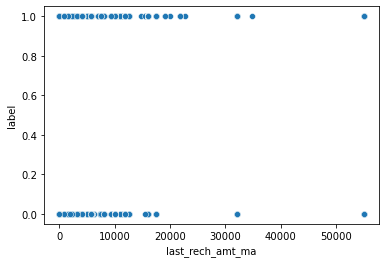

In [45]:
sns.scatterplot(x="last_rech_amt_ma",y="label",data=credit)


<AxesSubplot:xlabel='fr_ma_rech90', ylabel='label'>

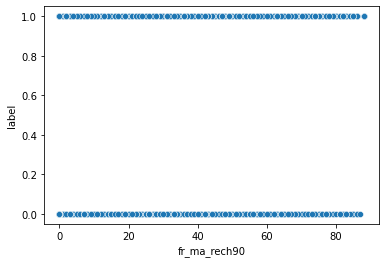

In [46]:
sns.scatterplot(x="fr_ma_rech90",y="label",data=credit)

**Observations**

fr_ma_rech90 = frequency of main account got recharged in last 90days both defaulters and non defaulters have equally recharged in last 90 days while defaulters have slight high frequency

<AxesSubplot:xlabel='maxamnt_loans90', ylabel='label'>

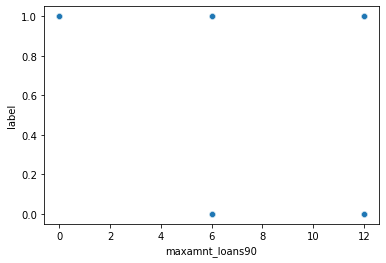

In [47]:
sns.scatterplot(x="maxamnt_loans90",y="label",data=credit)


<AxesSubplot:xlabel='rental90', ylabel='label'>

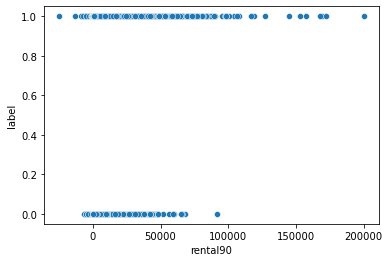

In [48]:
sns.scatterplot(x="rental90",y="label",data=credit)

**Observations**

rental90 = average amount account balance in last 90 days non - defaulters have maintained balance total upto 55,000 defaulters have maintained upto 1,50,000 but we can also observe negative balance is maintained more by defaulters



<AxesSubplot:xlabel='rental30', ylabel='label'>

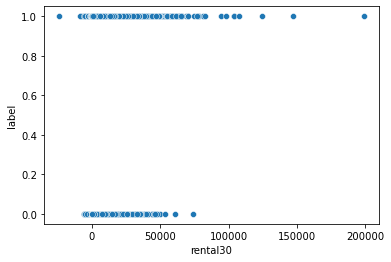

In [49]:
sns.scatterplot(x="rental30",y="label",data=credit)

**Observations**

rental30 = average amount account balance in last 30 days defaulters have maintained balance total upto 1,00,000 non - defaulters have maintained balance total upto 55,000 we can understand non defaulters have maintained both in 90 and 30 days balance upto 55,000 again defaulters have maintained more balance comparitively.



<AxesSubplot:xlabel='payback30', ylabel='label'>

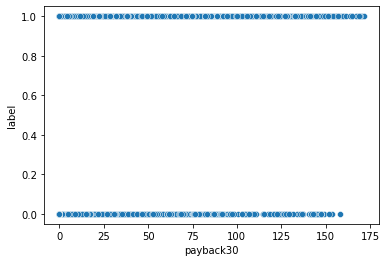

In [50]:
sns.scatterplot(x="payback30",y="label",data=credit)

**Observations**

payback30 = average payback time in last 30 days we can understand defaulters have taken more time to payback the loan amount borrowed which ranges between 0-175 in case of non defaulters payback period is 0 -155 Therefore non defaulters have taken more payback time



<AxesSubplot:xlabel='payback90', ylabel='label'>

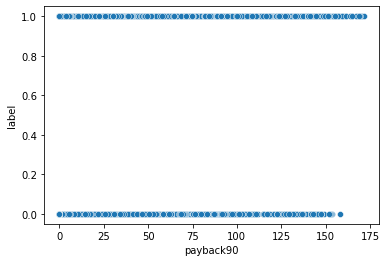

In [51]:
sns.scatterplot(x="payback90",y="label",data=credit)

**Observations**

payback90 = average payback time in last 90 days we can understand defaulters have taken more time to payback the loan amount borrowed which ranges between 0-175 in case of non defaulters payback period is 0 -155 Therefore non defaulters have taken more payback time

<AxesSubplot:xlabel='medianamnt_loans90', ylabel='label'>

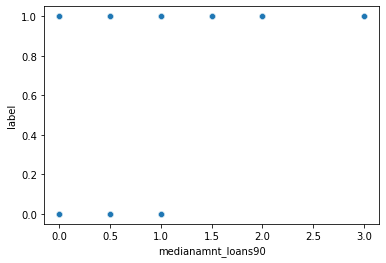

In [52]:
sns.scatterplot(x="medianamnt_loans90",y="label",data=credit)


**Observations**

medianamnt_90 = median amount of loan taken in last 90 days observing last 90 days recharge amount defaulters have borrowed more amount compared to non defaulters



<AxesSubplot:xlabel='medianamnt_loans30', ylabel='label'>

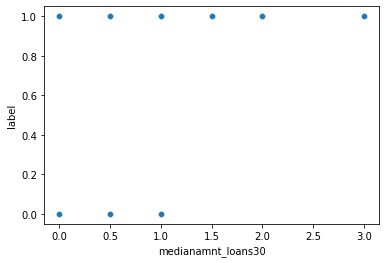

In [53]:
sns.scatterplot(x="medianamnt_loans30",y="label",data=credit)

**Observations**

medianamnt_30 = median amount of loan taken in last 30 days non defaulters have borrowed upto 10,000 but non defaulter have borrowed upto 20,000 and few and took 30,000 Therfore defaulters have borrowed more amount compared to non defaulters.



<AxesSubplot:xlabel='medianmarechprebal90', ylabel='label'>

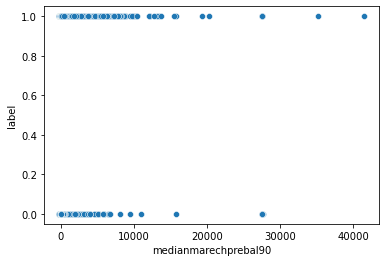

In [54]:
sns.scatterplot(x="medianmarechprebal90",y="label",data=credit)

**Observations**

medianmarechprebal90 = median of main account balance made just before recharge in last 90 days we can observe the balance maintained by defaulters is 0 -15,000 and few balances are scattered in the range while non defaulters have maintained upto 10,000 and few maintained at 15,000 and 28,000 which depicts defaulters have maintained more balance compritively.



In [56]:
credit['aon'] = credit['aon'].astype('int')
credit['last_rech_date_da'] = credit['last_rech_date_da'].astype('int')
credit['last_rech_date_ma'] = credit['last_rech_date_ma'].astype('int')
credit['fr_da_rech30'] = credit['fr_da_rech30'].astype('int')
credit['fr_ma_rech30']  = credit['fr_ma_rech30'].astype('int')
credit['cnt_da_rech30'] = credit['cnt_da_rech30'].astype('int')
credit['cnt_loans90'] = credit['cnt_loans90'].astype('int')
credit['last_rech_amt_ma'] = credit['last_rech_amt_ma'].astype('float')
credit['sumamnt_ma_rech90'] = credit['sumamnt_ma_rech90'].astype('float')
credit['amnt_loans30'] = credit['amnt_loans30'].astype('float')
credit['amnt_loans90'] = credit['amnt_loans90'].astype('float')
credit['maxamnt_loans90'] = credit['maxamnt_loans90'].astype('float')

DATA PROCESSING:-

In [57]:
data= credit.drop(['msisdn'], axis=1)

In [58]:
data= credit.drop(['pdate'], axis=1)

In [59]:
data = pd.get_dummies(data=credit, columns=['pmonth'])


In [60]:
data.skew()

label                   -2.270254
aon                     10.392950
daily_decr30             3.946230
daily_decr90             4.252565
rental30                 4.521929
rental90                 4.437681
last_rech_date_ma       14.790975
last_rech_date_da       14.814858
last_rech_amt_ma         3.781149
cnt_ma_rech30            3.283842
fr_ma_rech30            14.772834
sumamnt_ma_rech30        6.386787
medianamnt_ma_rech30     3.512324
medianmarechprebal30    14.779875
cnt_ma_rech90            3.425254
fr_ma_rech90             2.285423
sumamnt_ma_rech90        4.897950
medianamnt_ma_rech90     3.752706
medianmarechprebal90    44.880503
cnt_da_rech30           17.818410
fr_da_rech30            14.776431
cnt_da_rech90           27.267278
fr_da_rech90            28.988083
cnt_loans30              2.713421
amnt_loans30             2.975719
maxamnt_loans30         17.658052
medianamnt_loans30       4.551043
cnt_loans90             16.595040
amnt_loans90             3.150006
maxamnt_loans9

BOX PLOT:-

label                      AxesSubplot(0.125,0.816017;0.168478x0.0639831)
aon                     AxesSubplot(0.327174,0.816017;0.168478x0.0639831)
daily_decr30            AxesSubplot(0.529348,0.816017;0.168478x0.0639831)
daily_decr90            AxesSubplot(0.731522,0.816017;0.168478x0.0639831)
rental30                   AxesSubplot(0.125,0.739237;0.168478x0.0639831)
rental90                AxesSubplot(0.327174,0.739237;0.168478x0.0639831)
last_rech_date_ma       AxesSubplot(0.529348,0.739237;0.168478x0.0639831)
last_rech_date_da       AxesSubplot(0.731522,0.739237;0.168478x0.0639831)
last_rech_amt_ma           AxesSubplot(0.125,0.662458;0.168478x0.0639831)
cnt_ma_rech30           AxesSubplot(0.327174,0.662458;0.168478x0.0639831)
fr_ma_rech30            AxesSubplot(0.529348,0.662458;0.168478x0.0639831)
sumamnt_ma_rech30       AxesSubplot(0.731522,0.662458;0.168478x0.0639831)
medianamnt_ma_rech30       AxesSubplot(0.125,0.585678;0.168478x0.0639831)
medianmarechprebal30    AxesSubplot(0.

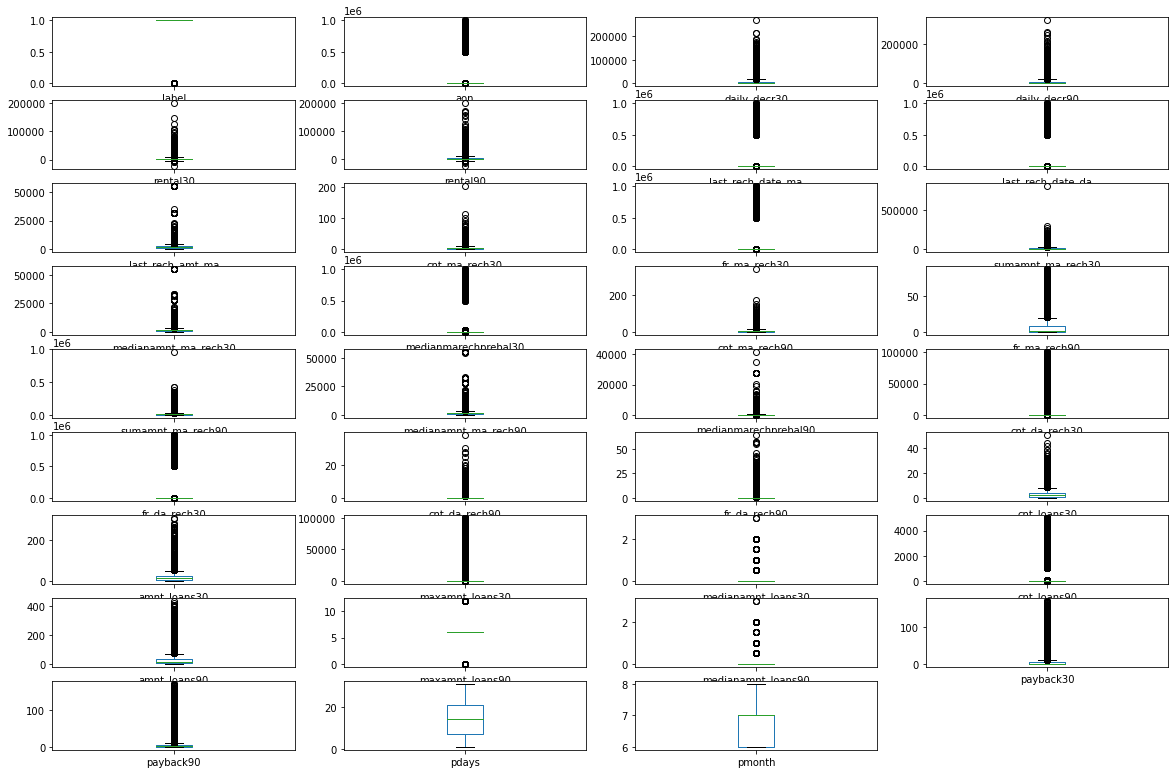

In [61]:
credit.plot(kind='box',subplots= True,layout=(10,4),figsize=(20,15))

**Observations**

we can't remove Outliers as the data is huge.

In [62]:
x= credit.drop(['label','sumamnt_ma_rech30','sumamnt_ma_rech90','cnt_loans30','cnt_loans90','payback90'],axis=1)
print(x.shape)
y=credit['label']
print(y.shape)

(209593, 31)
(209593,)


**Observations**

I have seperated X & Y data  assigned their shapes respectively.

In [63]:
x.shape

(209593, 31)

**Observations**

Shape of X is 209593 Rows & 31 Columns.

In [64]:
y.shape

(209593,)

**Observations**

The shape of is 209593 column

In [65]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.20,random_state=42)

**Observations**

Splitted the Data for X and Y shape respectively.

**Modelling & Processing the Data Set**

In [66]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC 



from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import BaggingClassifier



from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score

from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import mean_absolute_error,mean_squared_error

**Finding best paramenters**

In [73]:
model=[LogisticRegression(),GaussianNB(),SVC(),DecisionTreeClassifier(),KNeighborsClassifier(),RandomForestClassifier(),AdaBoostClassifier(),GradientBoostingClassifier(),BaggingClassifier()]

In [74]:
for m in model:
    m.fit(x_train,y_train)
    m.score(x_train,y_train)
    predm=m.predict(x_test)
    print('Accuracy Score of ',m,'is:')
    print(accuracy_score(y_test,predm))
    print(confusion_matrix(y_test,predm))
    print(classification_report(y_test,predm))
    print('*****************************************************************************************************************')
    print('\n')

ValueError: could not convert string to float: '93085I88648'

In [75]:
models=[LogisticRegression(),GaussianNB(),SVC(),DecisionTreeClassifier(),KNeighborsClassifier(),RandomForestClassifier(),AdaBoostClassifier(),GradientBoostingClassifier(),BaggingClassifier()]


In [79]:
for m in models:
    score=cross_val_score(m,x,y,cv=2,scoring='accuracy')
    print("Model:",m)
    print("Score:",score)
    print("MeanScore:",score.mean())
    print("Standard Deviation:",score.std())
    print('*****************************************************************************************************************')
    print('\n')

Model: LogisticRegression()
Score: [nan nan]
MeanScore: nan
Standard Deviation: nan
*****************************************************************************************************************


Model: GaussianNB()
Score: [nan nan]
MeanScore: nan
Standard Deviation: nan
*****************************************************************************************************************


Model: SVC()
Score: [nan nan]
MeanScore: nan
Standard Deviation: nan
*****************************************************************************************************************


Model: DecisionTreeClassifier()
Score: [nan nan]
MeanScore: nan
Standard Deviation: nan
*****************************************************************************************************************


Model: KNeighborsClassifier()
Score: [nan nan]
MeanScore: nan
Standard Deviation: nan
*****************************************************************************************************************


Model: RandomFore

# RANDOM FOREST CLASSIFIER

In [80]:
parameters={'criterion':('gini','entropy'),'n_estimators':range(1,10),'random_state': range(20,50)}
rf=RandomForestClassifier()

clf=GridSearchCV(rf,parameters)
clf.fit(x,y)
print(clf.best_params_)

KeyboardInterrupt: 

# ADABOOST CLASSIFIER

In [ ]:
parameters={'n_estimators':range(5,20),'algorithm':('SAMME','SAMME.R'),'random_state': range(20,40)}
adb=AdaBoostClassifier()

clf=GridSearchCV(adb,parameters)
clf.fit(x,y)
print(clf.best_params_)

# GRADIENT BOOSTING CLASSIFIER

In [ ]:
parameters={'n_estimators':range(5,20),'algorithm':('SAMME','SAMME.R'),'random_state': range(20,40)}
adb=GradientBoostingClassifier()

clf=GridSearchCV(adb,parameters)
clf.fit(x,y)
print(clf.best_params_)

# BAGGING CLASSIFIER

In [ ]:
parameters={'n_estimators':range(5,20),'algorithm':('SAMME','SAMME.R'),'random_state': range(20,40)}
adb=BaggingClassifier()

clf=GridSearchCV(adb,parameters)
clf.fit(x,y)
print(clf.best_params_)

In [ ]:
RFC=RandomForestClassifier()
ABC=AdaBoostClassifier()
GBC=GradientBoostingClassifier()
BC=BaggingClassifier()

In [ ]:
models=[LogisticRegression(),GaussianNB(),SVC(),DecisionTreeClassifier(),KNeighborsClassifier(),RandomForestClassifier(),AdaBoostClassifier(),GradientBoostingClassifier(),BaggingClassifier()]
